In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
from matplotlib import pyplot as plt
from datetime import datetime
import statistics
import numpy as np

In [ ]:
calendar_file = pd.read_csv('/content/drive/MyDrive/תואר שני/exploratory data analysis/calendar_clean_roy (2).csv')
listing_file = pd.read_csv('/content/drive/MyDrive/תואר שני/exploratory data analysis/listings_clean_roy (2).csv')

# Question 1
General overview of the Airbnb market in Boston over the past year (descriptive
analysis of the data). In the descriptive analysis please refer to the following:

In [ ]:
listings_df = listing_file.drop_duplicates().copy()
listings_df.host_since = listings_df.host_since.apply(pd.to_datetime)
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           3585 non-null   int64         
 1   summary                      3442 non-null   object        
 2   host_is_superhost            3585 non-null   object        
 3   host_since                   3585 non-null   datetime64[ns]
 4   host_response_time           3114 non-null   object        
 5   neighbourhood                3042 non-null   object        
 6   reviews_per_month            2829 non-null   float64       
 7   property_type                3582 non-null   object        
 8   beds                         3576 non-null   float64       
 9   review_scores_rating         2772 non-null   float64       
 10  review_scores_accuracy       2762 non-null   float64       
 11  review_scores_cleanliness    2767 non-null 

### Listings

In [ ]:
host_since_df = listings_df.groupby('host_since').agg({'id': np.size, 'beds': np.average, 'review_scores_rating': np.average, 'review_scores_accuracy': np.average, 
                                                       'review_scores_cleanliness' : np.average, 'review_scores_checkin': np.average, 'review_scores_communication': np.average, 
                                                       'review_scores_location': np.average, 'review_scores_value': np.average})

In [ ]:
host_since_month_df = host_since_df.groupby(pd.Grouper(freq='M')).agg({'id': np.size, 'beds': np.average, 'review_scores_rating': np.average, 'review_scores_accuracy': np.average, 
                                                       'review_scores_cleanliness' : np.average, 'review_scores_checkin': np.average, 'review_scores_communication': np.average, 
                                                       'review_scores_location': np.average, 'review_scores_value': np.average})

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
host_since_year_df = host_since_df.groupby(pd.Grouper(freq='Y')).agg({'id': np.size, 'beds': np.average, 'review_scores_rating': np.average, 'review_scores_accuracy': np.average, 
                                                       'review_scores_cleanliness' : np.average, 'review_scores_checkin': np.average, 'review_scores_communication': np.average, 
                                                       'review_scores_location': np.average, 'review_scores_value': np.average})


### a. Number of listings - Total, Monthly, Daily

In [ ]:
print('The total number of listings in Boston is: ',listings_df.id.nunique())
print('The monthly average number of listings joining Airbnb is: ',round(host_since_month_df.id.mean(), 2))
print('The yearly average number of listings joining Airbnb is: ',round(host_since_year_df.id.mean(), 2))

The total number of listings in Boston is:  3585
The monthly average number of listings joining Airbnb is:  13.48
The yearly average number of listings joining Airbnb is:  142.33


### b. Property types


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


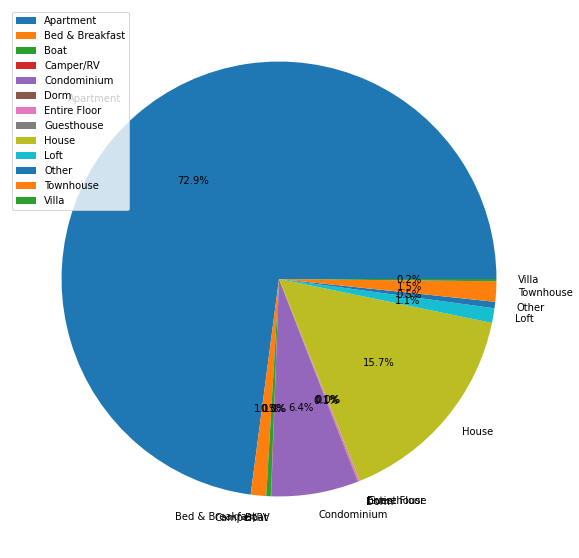

In [ ]:
plt.figure(figsize=(10,10))
property_type_df = listings_df[['property_type', 'id']].groupby('property_type').count()
plt.pie(property_type_df, labels=property_type_df.index, autopct='%1.1f%%')
plt.legend(loc='upper left')
plt.show()

### c. Number of beds

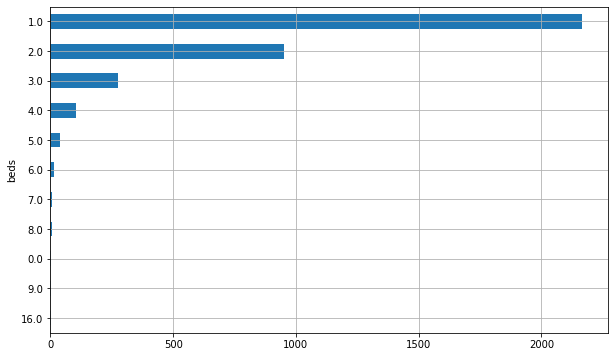

In [ ]:
beds_type_df = listings_df[['beds', 'id']].groupby('beds').count()
beds_type_df.sort_values(by='id', inplace=True)
beds_type_df.plot(kind='barh',figsize=(10,6),legend=False)
plt.grid()
plt.show()

### d. Host Types

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


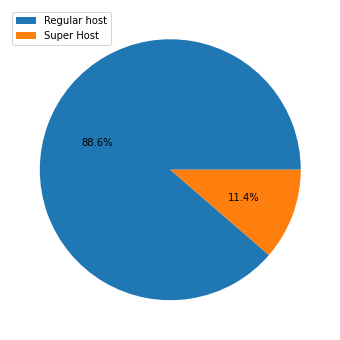

In [ ]:
plt.figure(figsize=(6,6))
host_type_df = listings_df[['host_is_superhost', 'id']].groupby('host_is_superhost').count()
plt.pie(host_type_df, autopct='%1.1f%%',)
plt.legend(['Regular host', 'Super Host'],loc='upper left')
plt.show()

### e. Apartment Ratings

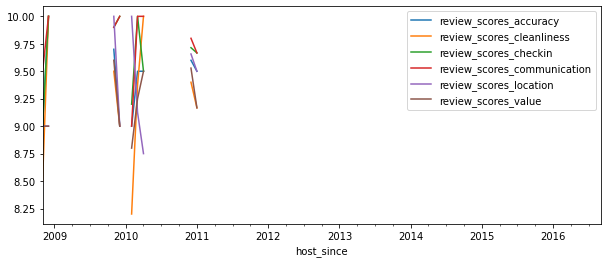

In [ ]:
host_since_month_df[['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                    'review_scores_communication', 'review_scores_location', 'review_scores_value']].plot(kind='line', figsize=(10,4))
plt.show()

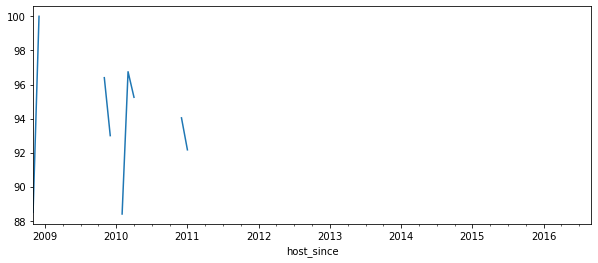

In [ ]:
host_since_month_df.review_scores_rating.plot(kind='line', figsize=(10,4))
plt.show()

We see from the data that it won't be possible to understand if there's any relationship between the data a listing was first introduced to Airbnb and it's ratings. 
Thus we'll be trying a different approch

In [ ]:
listings_df[['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                    'review_scores_communication', 'review_scores_location', 'review_scores_value']].describe().loc[['count','mean', 'std', 'min', 'max']]

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000
mean,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234
std,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116
min,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


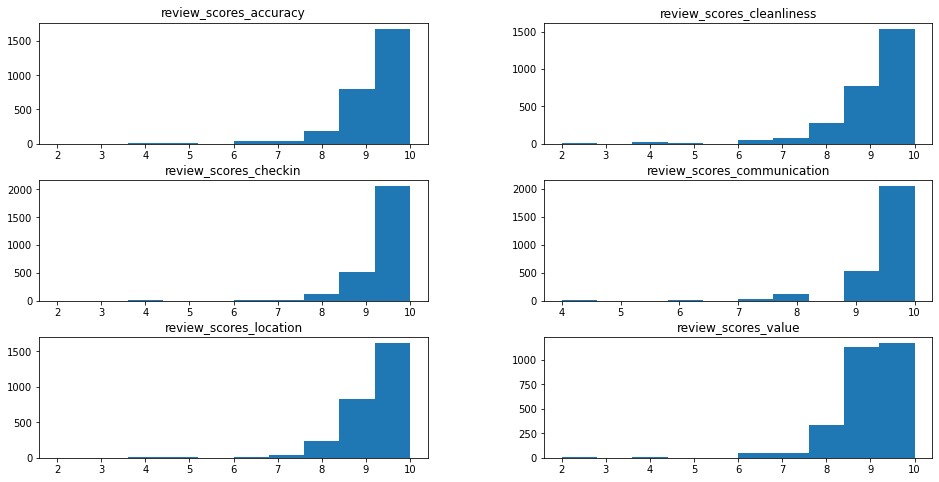

In [ ]:
listings_df[['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                    'review_scores_communication', 'review_scores_location', 'review_scores_value']].hist(grid=False, figsize=(16,8), bins=10)
plt.show()

In [ ]:
listings_df.review_scores_rating.describe().loc[['count','mean', 'std', 'min', 'max']]

count    2772.000000
mean       91.916667
std         9.531686
min        20.000000
max       100.000000
Name: review_scores_rating, dtype: float64

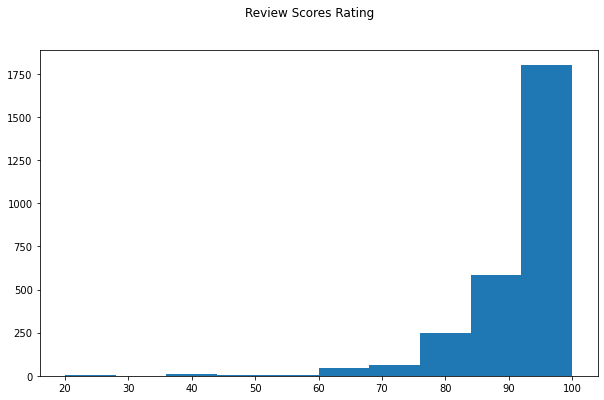

In [ ]:
listings_df.review_scores_rating.hist(grid=False, figsize=(10,6))
plt.suptitle("Review Scores Rating")
plt.show()

# Question 2
Provide an overview of the Airbnb business growth trend over the past year. In
the business growth analysis please refer to the following:

### a. Define a key metric that can capture and demonstrate AirBnb’s business growth in the market. (number of listings, cumulative number of listings)



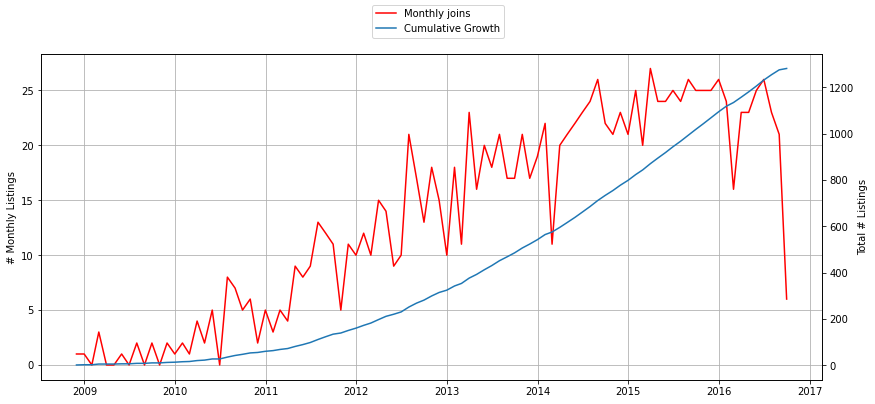

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
plt.grid()
plt.plot(host_since_month_df.index, host_since_month_df.id, 'r', label='Monthly joins')
ax.set_ylabel('# Monthly Listings')

ax2 = ax.twinx()
plt.plot(host_since_month_df.index, host_since_month_df.id.cumsum(), label='Cumulative Growth')
ax2.set_ylabel('Total # Listings')

lines = []
labels = []
for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

fig.legend(lines, labels, loc = 'upper center')

plt.show()

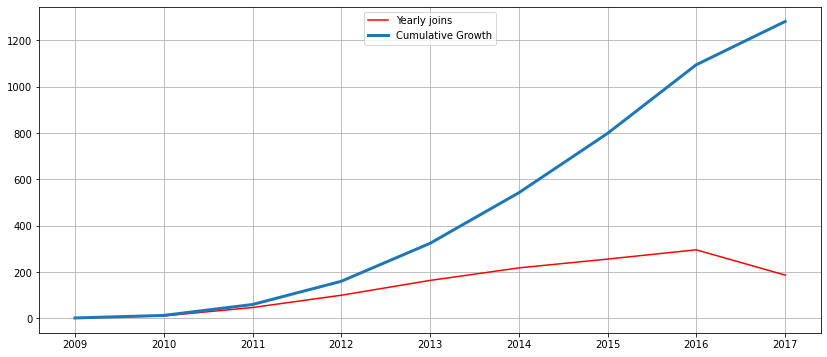

In [ ]:
plt.figure(figsize=(14,6))
plt.grid()
plt.plot(host_since_year_df.index, host_since_year_df.id, 'r', label='Yearly joins')
plt.plot(host_since_year_df.index, host_since_year_df.id.cumsum(), label='Cumulative Growth', linewidth =3)
plt.legend(loc = 'upper center')
plt.show()

### b. Business growth per neighborhood

In [ ]:
neighborhood_type_df = listings_df[['neighbourhood', 'id', 'host_since']].groupby(['neighbourhood', 
                                                                                   'host_since']).count()

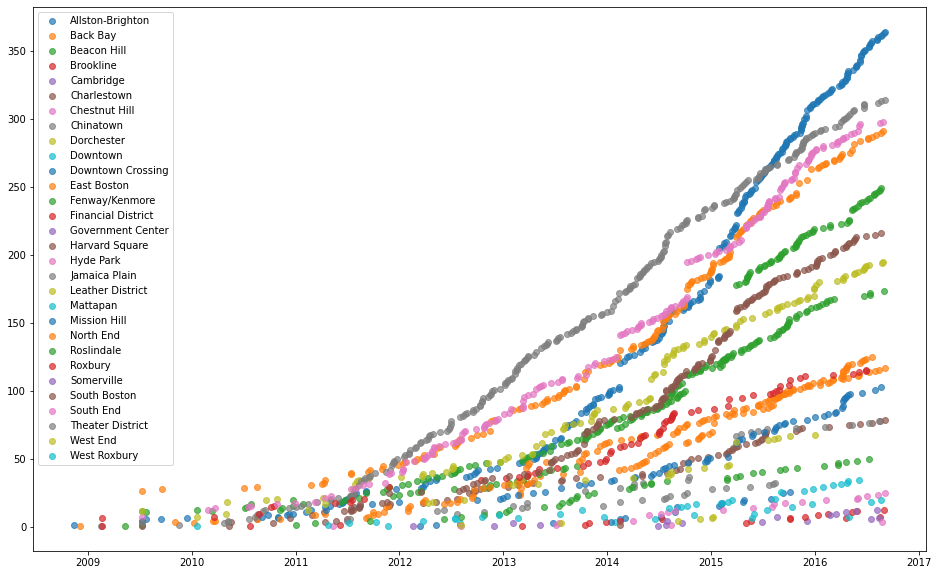

In [ ]:
plt.figure(figsize=(16,10))
temp_1 = neighborhood_type_df.copy()
groups = temp_1.reset_index().groupby("neighbourhood")
for name, group in groups:
    plt.plot(group["host_since"], group["id"].cumsum(), marker="o", linestyle="", label=name, alpha=0.7)
plt.legend(loc='upper left')
plt.show()

### Preprocessing calendar's data:

In [ ]:
calendar_df = calendar_file.drop_duplicates().copy()

In [ ]:
calendar_df.head()

,listing_id,date,price_dollars,available_category
0,12147973,2017-09-05,NaN,0
1,12147973,2017-09-04,NaN,0
2,12147973,2017-09-03,NaN,0
3,12147973,2017-09-02,NaN,0
4,12147973,2017-08-31,NaN,0


In [ ]:
calendar_df.date = pd.to_datetime(calendar_df.date)
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915684 entries, 0 to 915848
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   listing_id          915684 non-null  int64         
 1   date                915684 non-null  datetime64[ns]
 2   price_dollars       449816 non-null  float64       
 3   available_category  915684 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 34.9 MB


In [ ]:
calendar_df.isna().sum()

listing_id                 0
date                       0
price_dollars         465868
available_category         0
dtype: int64

In [ ]:
calendar_df.fillna(calendar_df.groupby('listing_id').transform('mean'), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/generic.py:1475: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  fast_path = lambda group: getattr(group, func)(*args, **kwargs)


In [ ]:
calendar_df.isna().sum()

listing_id                 0
date                       0
price_dollars         175617
available_category         0
dtype: int64

We understand that there are still many listings that have no price to calculate an average, thus for those listings we'll fill the price with the average price per that day

In [ ]:
calendar_df.fillna(calendar_df.groupby('date').transform('mean'), inplace=True)

In [ ]:
calendar_df.isna().sum()

listing_id            0
date                  0
price_dollars         0
available_category    0
dtype: int64

In [ ]:
calendar_df.head()

,listing_id,date,price_dollars,available_category
0,12147973,2017-09-05,198.093,0
1,12147973,2017-09-04,197.706,0
2,12147973,2017-09-03,198.985,0
3,12147973,2017-09-02,204.15,0
4,12147973,2017-08-31,203.18,0


In [ ]:
calendar_df['revenue_per_listing'] = np.where(calendar_df.available_category == 0, calendar_df.price_dollars, 0)
calendar_df['lost_revenue_per_listing'] = np.where(calendar_df.available_category == 1, calendar_df.price_dollars, 0)
calendar_df.head()

,listing_id,date,price_dollars,available_category,revenue_per_listing,lost_revenue_per_listing
0,12147973,2017-09-05,198.093,0,198.093,0
1,12147973,2017-09-04,197.706,0,197.706,0
2,12147973,2017-09-03,198.985,0,198.985,0
3,12147973,2017-09-02,204.15,0,204.15,0
4,12147973,2017-08-31,203.18,0,203.18,0


In [ ]:
calendar_day_df = calendar_df.groupby('date').agg({'listing_id': np.size, 'available_category': np.sum, 
                                                   'revenue_per_listing': np.sum, 'lost_revenue_per_listing': np.sum})
calendar_day_df.columns = ['total_number_of_listings', 'number_of_available_listings', 'revenue_per_listing', 'lost_revenue_per_listing']
calendar_day_df.head()

,total_number_of_listings,number_of_available_listings,revenue_per_listing,lost_revenue_per_listing
date,,,,
2016-09-06,2473,388,380956.951027,96276.0
2016-09-07,2505,655,334224.410161,165426.0
2016-09-08,2531,697,329122.010457,174855.0
2016-09-09,2474,672,321269.896686,175933.0
2016-09-10,2482,646,330107.692781,169934.0


In [ ]:
calendar_day_df['price_per_reserved_listing'] = calendar_day_df.revenue_per_listing / (calendar_day_df.total_number_of_listings - calendar_day_df.number_of_available_listings)
calendar_day_df['lost_revenue_per_listing'] = calendar_day_df.lost_revenue_per_listing / calendar_day_df.number_of_available_listings
calendar_day_df['occupancy_rate'] = (calendar_day_df.total_number_of_listings - calendar_day_df.number_of_available_listings) / calendar_day_df.total_number_of_listings

calendar_day_df.head()

,total_number_of_listings,number_of_available_listings,revenue_per_listing,lost_revenue_per_listing,price_per_reserved_listing,occupancy_rate
date,,,,,,
2016-09-06,2473,388,380956.951027,248.134021,182.713166,0.843106
2016-09-07,2505,655,334224.410161,252.558779,180.661843,0.738523
2016-09-08,2531,697,329122.010457,250.868006,179.455840,0.724615
2016-09-09,2474,672,321269.896686,261.805060,178.285181,0.728375
2016-09-10,2482,646,330107.692781,263.055728,179.797218,0.739726


### c. Price changes and price/growth trends

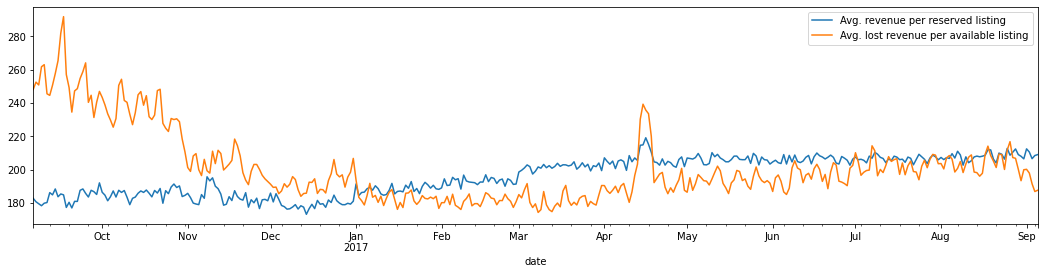

In [ ]:
calendar_day_df.price_per_reserved_listing.plot(figsize=(18,4), label='Avg. revenue per reserved listing')
calendar_day_df.lost_revenue_per_listing.plot(label= 'Avg. lost revenue per available listing')
plt.legend()
plt.show()

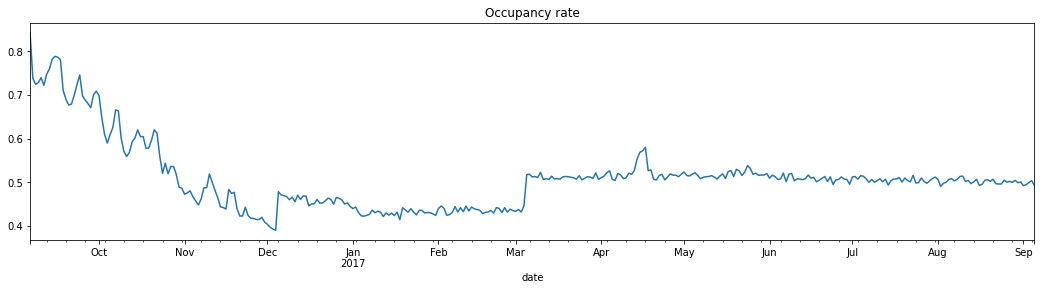

In [ ]:
calendar_day_df.occupancy_rate.plot(figsize=(18,4), title= 'Occupancy rate')
plt.show()

What we understand by looking at both charts one after the other, is that during 2016, the occupancy rates were extremely high, which caused a competition and higher prices for listings (avaiable listings in particular).

As the occupancy rates dropped to 50%-40%, we start seeing a change of trend, while reserved listings are priced in higher prices and available listings are lowering their prices in order to increace occupancy rates.
From the spike it April 2017 we see stagnation in both occupancy rates and the listing prices

# Question 3
What is the home availability pattern (​generate a metric which captures availability well​), and its relation to prices?

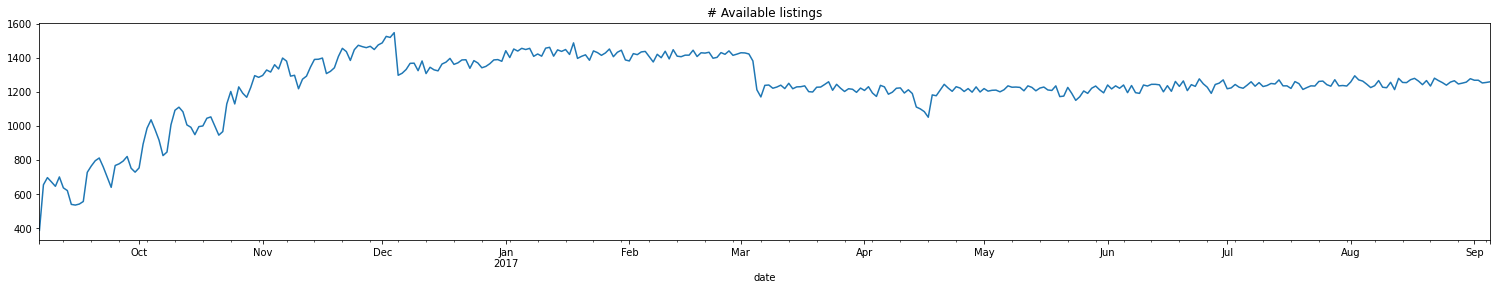

In [ ]:
calendar_day_df.number_of_available_listings.plot(figsize=(26,4), title='# Available listings')
plt.show()

Let's narrow this graph to see the dates more closely

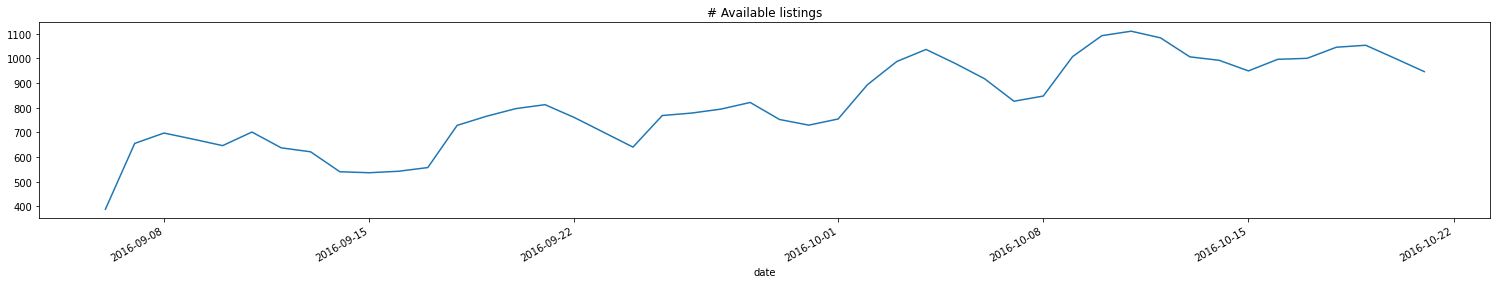

In [ ]:
calendar_day_df[calendar_day_df.index < '2016-10-22'].number_of_available_listings.plot(figsize=(26,4), title='# Available listings',x_compat=True)
plt.show()

In [ ]:
tmp = calendar_day_df[calendar_day_df.index < '2016-10-22'].reset_index()

In [ ]:
tmp['day_of_week'] = tmp.date.dt.day_name()
availability_pattern_df = tmp.groupby('day_of_week').sum().number_of_available_listings.reset_index()

In [ ]:
availability_pattern_df.to_csv('/content/drive/MyDrive/Colab Notebooks/bla.csv')

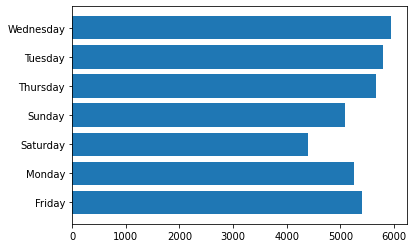

In [ ]:
plt.barh('day_of_week', 'number_of_available_listings', data=availability_pattern_df)
plt.show()

We can see that in fact the pattern indicates a higher demand during the weekend. The days of the week with more availability are during the week while in Saturday & Sunday (AKA the weekend) there are less available listings, as people are on vacations

### a.
i. Available Apartments - By looking at the number of available listings over time we're seeing an increase in 2016 and stagnation at 2017. This metric helps understanding the situation but only if we're looking at it together with other metrics as it might show half a truth. For instace, if the number of Airbnb listings in the market has grown a lot (which it has in this case), the number of available listings metric alone doesn't indicate that more people are renting apartments or not. It just states that there are more available listings.

ii. Availabillity Rate - Or occupancy rate, has we called it before. This is a more accurate metric as it considers the number of listings that the market has to offer. 

### b.
In a perfect market, the occupancy rate metric and the average apartment price per day should correlate negatively. The forces of the market are lowering down the rent prices when the occupancy rates are higher and do the opposite when they are low. We all know that vacations during the holidays for example, where the demand is higher, causes the average price to increase.

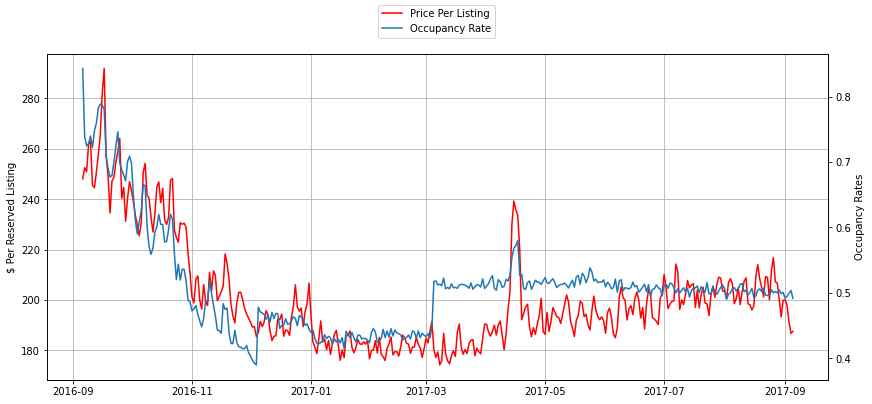

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
plt.grid()
plt.plot(calendar_day_df.lost_revenue_per_listing, 'r', label='Price Per Listing')
ax.set_ylabel('$ Per Reserved Listing')

ax2 = ax.twinx()
plt.plot(calendar_day_df.occupancy_rate, label='Occupancy Rate')
ax2.set_ylabel('Occupancy Rates')

lines = []
labels = []
for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

fig.legend(lines, labels, loc = 'upper center')

plt.show()

# Question 4
Characterize the distribution of prices. Then - choose how to bucket prices into 3 categories.

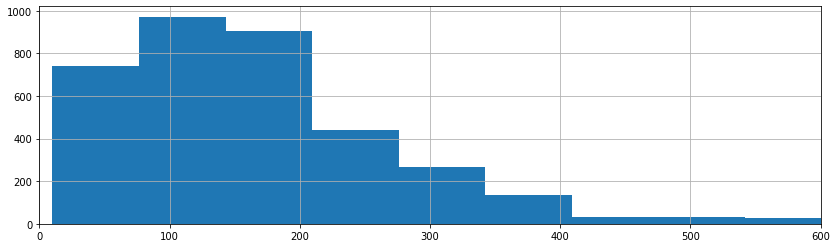

In [ ]:
listings_df.price_dollars.hist(bins=60, figsize=(14,4))
plt.xlim(0,600)
plt.show()

In [ ]:
listings_df.price_dollars.describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price_dollars, dtype: float64

In [ ]:
listings_df.price_dollars.quantile([.33, .66])

0.33    100.0
0.66    195.0
Name: price_dollars, dtype: float64

We see that most of the listing prices fall between 10 to 200 dollars. 
1/3rd of the listings are priced up to 100 dollars. 
Another third are priced between 101 to  195 and the rest are higher than 195 dollars

**This would be are buckets:**

Up to 100 dollars -  Category 1

Between 100 to 195 dollars - Category 2

More than 195 dollars - Category 3



In [ ]:
price_bucket_conditions = [(listings_df.price_dollars <= 100),
                           (listings_df.price_dollars > 101) & (listings_df.price_dollars <= 195),
                           (listings_df.price_dollars > 195)
                           ]
values = [1, 2, 3]
listings_df['price_segment'] = np.select(price_bucket_conditions, values)

In [ ]:
listings_df.head()

,id,summary,host_is_superhost,host_since,host_response_time,neighbourhood,reviews_per_month,property_type,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price_dollars,price_segment
0,12147973,"Cozy, sunny, family home. Master bedroom high...",f,2015-04-15,NaN,Roslindale,NaN,House,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250,3
1,3075044,Charming and quiet room in a second floor 1910...,f,2012-06-07,within an hour,Roslindale,1.30,Apartment,1.0,94.0,10.0,9.0,10.0,10.0,9.0,9.0,65,1
2,6976,"Come stay with a friendly, middle-aged guy in ...",t,2009-05-11,within a few hours,Roslindale,0.47,Apartment,1.0,98.0,10.0,9.0,10.0,10.0,9.0,10.0,65,1
3,1436513,Come experience the comforts of home away from...,f,2013-04-21,within a few hours,NaN,1.00,House,2.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,75,1
4,7651065,"My comfy, clean and relaxing home is one block...",t,2014-05-11,within an hour,Roslindale,2.25,House,2.0,99.0,10.0,10.0,10.0,10.0,9.0,10.0,79,1


In [ ]:
listings_df.isnull().sum()

id                               0
summary                        143
host_is_superhost                0
host_since                       0
host_response_time             471
neighbourhood                  543
reviews_per_month              756
property_type                    3
beds                             9
review_scores_rating           813
review_scores_accuracy         823
review_scores_cleanliness      818
review_scores_checkin          820
review_scores_communication    818
review_scores_location         822
review_scores_value            821
price_dollars                    0
price_segment                    0
dtype: int64

### a. What is the relationship between price and rating of individual houses?

In [ ]:
listings_df[listings_df.property_type == 'House'][['price_segment', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                    'review_scores_communication', 'review_scores_location', 'review_scores_value']].corr()['price_segment'][1:]

review_scores_rating           0.128792
review_scores_accuracy         0.101956
review_scores_cleanliness      0.159091
review_scores_checkin          0.069836
review_scores_communication    0.125349
review_scores_location         0.182145
review_scores_value            0.070463
Name: price_segment, dtype: float64

For individual houses it seems like there's a small positive correlation between the price segments and the different rating categories.
The highest correlation is between the price and the location ratings, which is almost 20% correlation.

### b. What is the relation between Neighbourhood location and average prices?

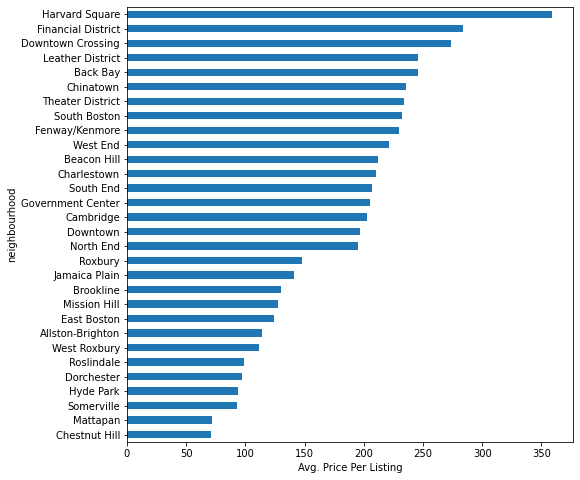

In [ ]:
avg_price_per_neighbourhood_df = listings_df.groupby('neighbourhood').mean()['price_dollars'].sort_values()
avg_price_per_neighbourhood_df.plot.barh(figsize=(8,8))
plt.xlabel('Avg. Price Per Listing')
plt.show()

As we can see in the bar chart above, there are some neighbourhoods that the average price per listing is higher than other (such as Harvard Square), where the average price per listing is over 350 dollars, compare to neighbourhoods like Mattapan and Chestnut Hill, where the average price per listing is around 70 dollars

### c. Join the two datasets - What is the relation between Neighbourhood and occupancy? (build a contingency table).

In [ ]:
grouped_df = calendar_df.merge(listings_df, how='inner', left_on='listing_id', right_on='id')
grouped_df.price_dollars_x = grouped_df.price_dollars_x.astype(int)

In [ ]:
date_and_neighbourhood_df = grouped_df.groupby(['date', 'neighbourhood']).agg({'listing_id': np.size, 'available_category': np.sum,
                                                                              'price_dollars_x': np.sum})
date_and_neighbourhood_df['occupancy_rate'] = (date_and_neighbourhood_df.listing_id - date_and_neighbourhood_df.available_category) / date_and_neighbourhood_df.listing_id
date_and_neighbourhood_df.head()

listing_id  ...  occupancy_rate
date       neighbourhood                 ...                
2016-09-06 Allston-Brighton         238  ...        0.861345
           Back Bay                 198  ...        0.828283
           Beacon Hill              102  ...        0.921569
           Brookline                  5  ...        1.000000
           Cambridge                  6  ...        0.500000

[5 rows x 4 columns]

Since building a contingency table for all possible occupancy rates, we've decided to bucket the occupancy rates into 5 buckets, 20% each:

In [ ]:

tmp = date_and_neighbourhood_df.reset_index()
occupancy_bucket_conditions = [(tmp.occupancy_rate <= 0.2),
                              (tmp.occupancy_rate > 0.2) & (tmp.occupancy_rate <= 0.4),
                              (tmp.occupancy_rate > 0.4) & (tmp.occupancy_rate <= 0.6),
                              (tmp.occupancy_rate > 0.6) & (tmp.occupancy_rate <= 0.8),
                              (tmp.occupancy_rate > 0.8)
                              ]
values = [1, 2, 3, 4, 5]
tmp['occupancy_segment'] = np.select(occupancy_bucket_conditions, values)
tmp.head()

,date,neighbourhood,listing_id,available_category,price_dollars_x,occupancy_rate,occupancy_segment
0,2016-09-06,Allston-Brighton,238,33,36120,0.861345,5
1,2016-09-06,Back Bay,198,34,52505,0.828283,5
2,2016-09-06,Beacon Hill,102,8,22676,0.921569,5
3,2016-09-06,Brookline,5,0,673,1.000000,5
4,2016-09-06,Cambridge,6,3,1253,0.500000,3


In [ ]:

data_crosstab = pd.crosstab(tmp.neighbourhood,  tmp.occupancy_segment, margins = False) 
data_crosstab

occupancy_segment,1,2,3,4,5
neighbourhood,,,,,
Allston-Brighton,0,0,125,231,9
Back Bay,0,91,244,29,1
Beacon Hill,0,0,300,32,33
Brookline,6,22,106,168,63
Cambridge,133,118,90,19,5
Charlestown,0,5,306,43,11
Chestnut Hill,105,182,51,5,16
Chinatown,43,125,12,185,0
Dorchester,0,301,33,25,6


We see that in Allston-Brighton	neighbourhood, that we also saw before as a rapidly growing neighbourhood in the rental listing market, the occupancy rates are segmented very high (segments 3-5), meanning over 60% occupancy (and over 80% occupancy in average)
Government Center	neighbourhood on the other end, was segmented with poor occupancy rates.

### d. Join the two datasets- which neighbourhoods show the highest price volatilities? Look for some external online explanation

In [ ]:
neighbourhoods_list = date_and_neighbourhood_df.reset_index().neighbourhood.unique().tolist()

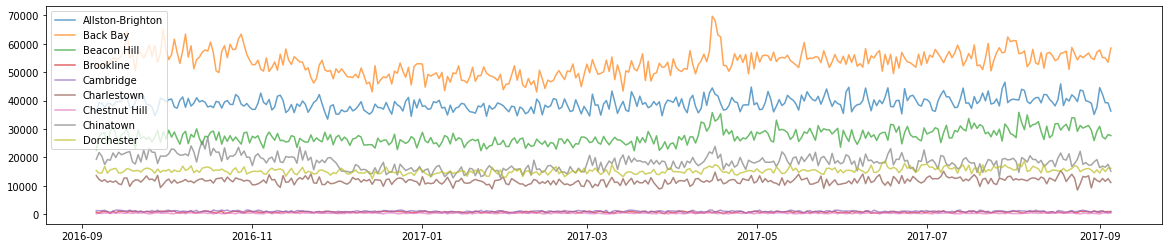

In [ ]:
plt.figure(figsize=(20,4))
temp_1 = date_and_neighbourhood_df.reset_index()
temp_1 = temp_1[temp_1.neighbourhood.isin(neighbourhoods_list[:9])]
groups = temp_1.reset_index().groupby("neighbourhood")
for name, group in groups:
    plt.plot(group["date"], group["price_dollars_x"], linestyle="-", label=name, alpha=0.7)
plt.legend(loc='upper left')
plt.show()

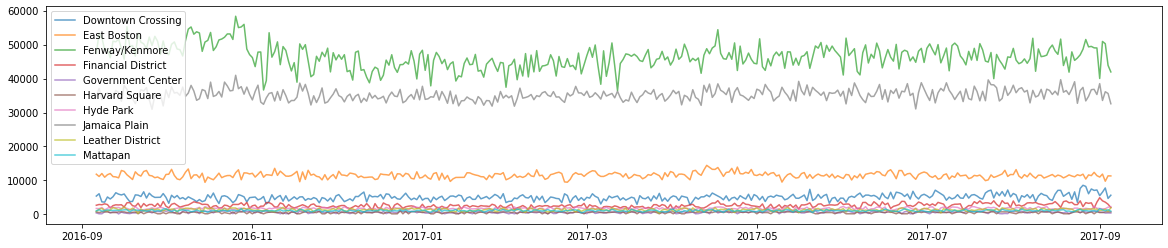

In [ ]:
plt.figure(figsize=(20,4))
temp_2 = date_and_neighbourhood_df.reset_index()
temp_2 = temp_2[temp_2.neighbourhood.isin(neighbourhoods_list[10:20])]
groups = temp_2.reset_index().groupby("neighbourhood")
for name, group in groups:
    plt.plot(group["date"], group["price_dollars_x"], linestyle="-", label=name, alpha=0.7)
plt.legend(loc='upper left')
plt.show()

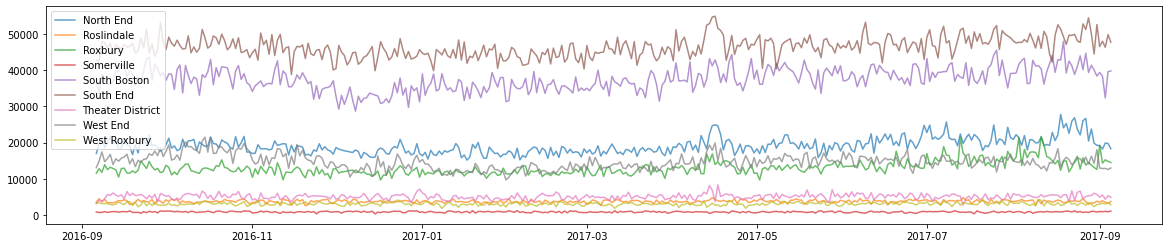

In [ ]:
plt.figure(figsize=(20,4))
temp_3 = date_and_neighbourhood_df.reset_index()
temp_3 = temp_3[temp_3.neighbourhood.isin(neighbourhoods_list[21:])]
groups = temp_3.reset_index().groupby("neighbourhood")
for name, group in groups:
    plt.plot(group["date"], group["price_dollars_x"], linestyle="-", label=name, alpha=0.7)
plt.legend(loc='upper left')
plt.show()

# Question 5
Identify an outlier date range in the data.

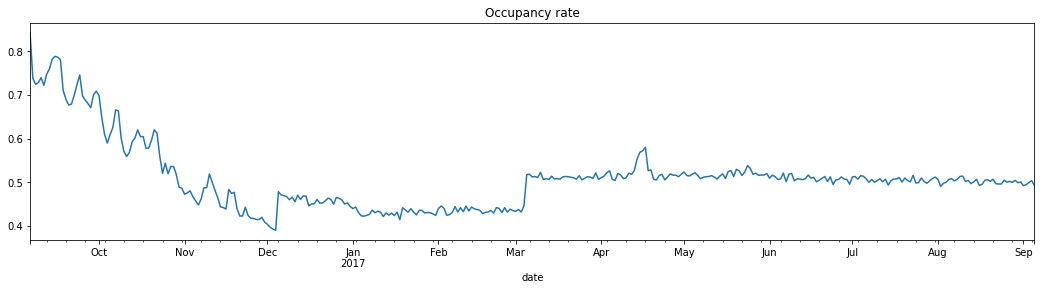

In [ ]:
calendar_day_df.occupancy_rate.plot(figsize=(18,4), title= 'Occupancy rate')
plt.show()

We chose to look for outliers by looking at the occupancy rates, since we think this is the best metric to describe the situation in the Airbnb listing market, as it affects prices, number of available listings etc.
There are some large changes in this graph, for instance, December 2016 or March 2017, but we're not considering them as outliers, as these points were the start of a similar trend.
What we do consider as an outlier, is the spike in April 17th, as there was a stagnation before and afterwords. It looks like there was something in that certain date - and there was in fact - The Boston Marathon

### a. Should that outlier be removed from the data?
We believe it would be wrong to remove this outlier from the data, as it wasn't caused by accident, and furthermore, business wise it will be best to look at these very occasions that may cause a spike in the number of reserved listings in order to prepare in advance (make special offers to these days or rise the prices per these nights)